# Information Retrieval in High Dimensional Data - Assignment 2

## Group 29 - Members List
***
* Smith Agarwal - Mtr. No 03693295
* Shyam Arumugaswamy - Mtr. No 03694390
* Mainak Ghosh - Mtr. No 03693369
* Shayoni Halder - Mtr. No  03693443
* Aadhithya Sankar - Mtr. No 03693549

## Task 1
***
**Part 1:**

$X = U \Sigma V^T$ and the singular values in order are $\sigma_{1,1},\sigma_{2,2}, ... ,\sigma_{p,p} $

Now we know that the first singular value is calculated as: $ \sigma_{1,1} = \max_{||v||_2 = 1}{||Xv||_2} $

Let $v_1$ be the first right singluar vector corresponsing to the first singluar value. Hence, $v_1 = arg \max_{||v||_2 = 1} ||Xv||_2 $

\begin{eqnarray*}
\sigma_{1,1}^2&=&\max_{||v||_2 = 1} ||Xv||_2^2 \\
&=& ||Xv_1||_2^2 = (Xv_1)^T(Xv_1)\\
&=& v_1^TX^TXv_1\\
&=& v_1^T(U \Sigma V^T)^T(U \Sigma V^T)v_1\\
&=& v_1^TV \Sigma^T U^T U \Sigma V^T v_1\\
&=& v_1^TV \Sigma^T \Sigma V^T v_1     \   \ \   \     \text{                     as U is a unitary matrix}
\end{eqnarray*}

Hence the term $v_1^TV \Sigma^T \Sigma V^T v_1$ is maximized because of $v_1$. We can take $s^* = V^Tv_1$. Then as $V^T$ is of $p*n$ dimensions and $v_1$ is of n-dimensional. Hence, $s^*$ is of p-dimensional.

Also, the columns of $V$ are made of the right singular vectors where the first column is $v_1$, second column is $v_2$ and so on. As the columns of $V$ are orthonormal so, $V^Tv_1 = (1,0,...,0) \in R^p$ 

Therefore $s^* = (1,0,...,0) \in R^p$ is a p-dimensional normalized vector.


**Part 2:**

Let us choose $a$ a p-dimensional vector such that it is normalized. Now as the data is centered, so the variance is $\frac{1}{N} {XX^T}$. Let $S$ be the variance of the centered data. 

\begin{eqnarray*}
\frac{1}{N} \sum_{i=1}^{N}{(a^Tx_i)^2}&=&\frac{1}{N} {a^TXX^Ta}\\
&=&a^TSa
\end{eqnarray*}

As we need to maximize $a^TSa$, we use Lagrange multipliers and maximize $a^TSa + \lambda (1-a^Ta)$ under the constraint that $||a|| =1$. On differentiating, with respect to $a$ and equating it to 0, we get 
\begin{equation*}
Sa = \lambda a
\end{equation*}
This shows that $a$ is an eigenvector of $S$ and $\lambda$ is an eigenvalue. Also, on multiplying $a^T$ on both sides, we get

\begin{equation*}
a^TSa = \lambda
\end{equation*}
Therfore, the variance is equal to an eigenvalue. To maximize, we pick up the highest eigenvalue. Therefore, $a$ becomes the eigenvector corresponding to the highest eigenvalue which is precisely the first column of $U$.



## Task 2
***

For this task, download the modied version of the Yale Face Database B provided on Moodle (task2_data.zip). The Yale Face Database B consists of single light source images of 10 subjects, each seen in different poses and illumination conditions. In the provided form the database is divided into 5 subsets. In subset 0 the subject is illuminated by an almost frontal light source, while for subsets 1-4 the light source is gradually moved along the horizon. Subset 0 will serve as the training
set, while subsets 1-4 are used for testing.

* Write a function that takes as an input matrix T of vectorized images from subset 0. The output of this function are the 20 first singular vectors U[:, 1], . . . , U[:, 20]. Display the first 3 vectors as images, i.e., reshape them to size 50×50 and display them.

First 20 singular vectors are:

[[-0.01048732 -0.01025498 -0.01048144 ..., -0.01413924 -0.01240749
  -0.01122921]
 [-0.03392782 -0.03264884 -0.03866268 ...,  0.00640562 -0.00043264
   0.00342655]
 [-0.01377794 -0.00790541 -0.00335353 ...,  0.03567342  0.03926606
   0.04124219]
 ..., 
 [-0.01006128 -0.03563369 -0.0236887  ...,  0.00338551  0.00628929
  -0.00313863]
 [ 0.00030659  0.0162163   0.01183814 ..., -0.01494478 -0.0059918
  -0.00602408]
 [-0.0011373  -0.0049596   0.01046364 ...,  0.00590317  0.00230929
   0.00187178]]

 First 20 vectors as images: 



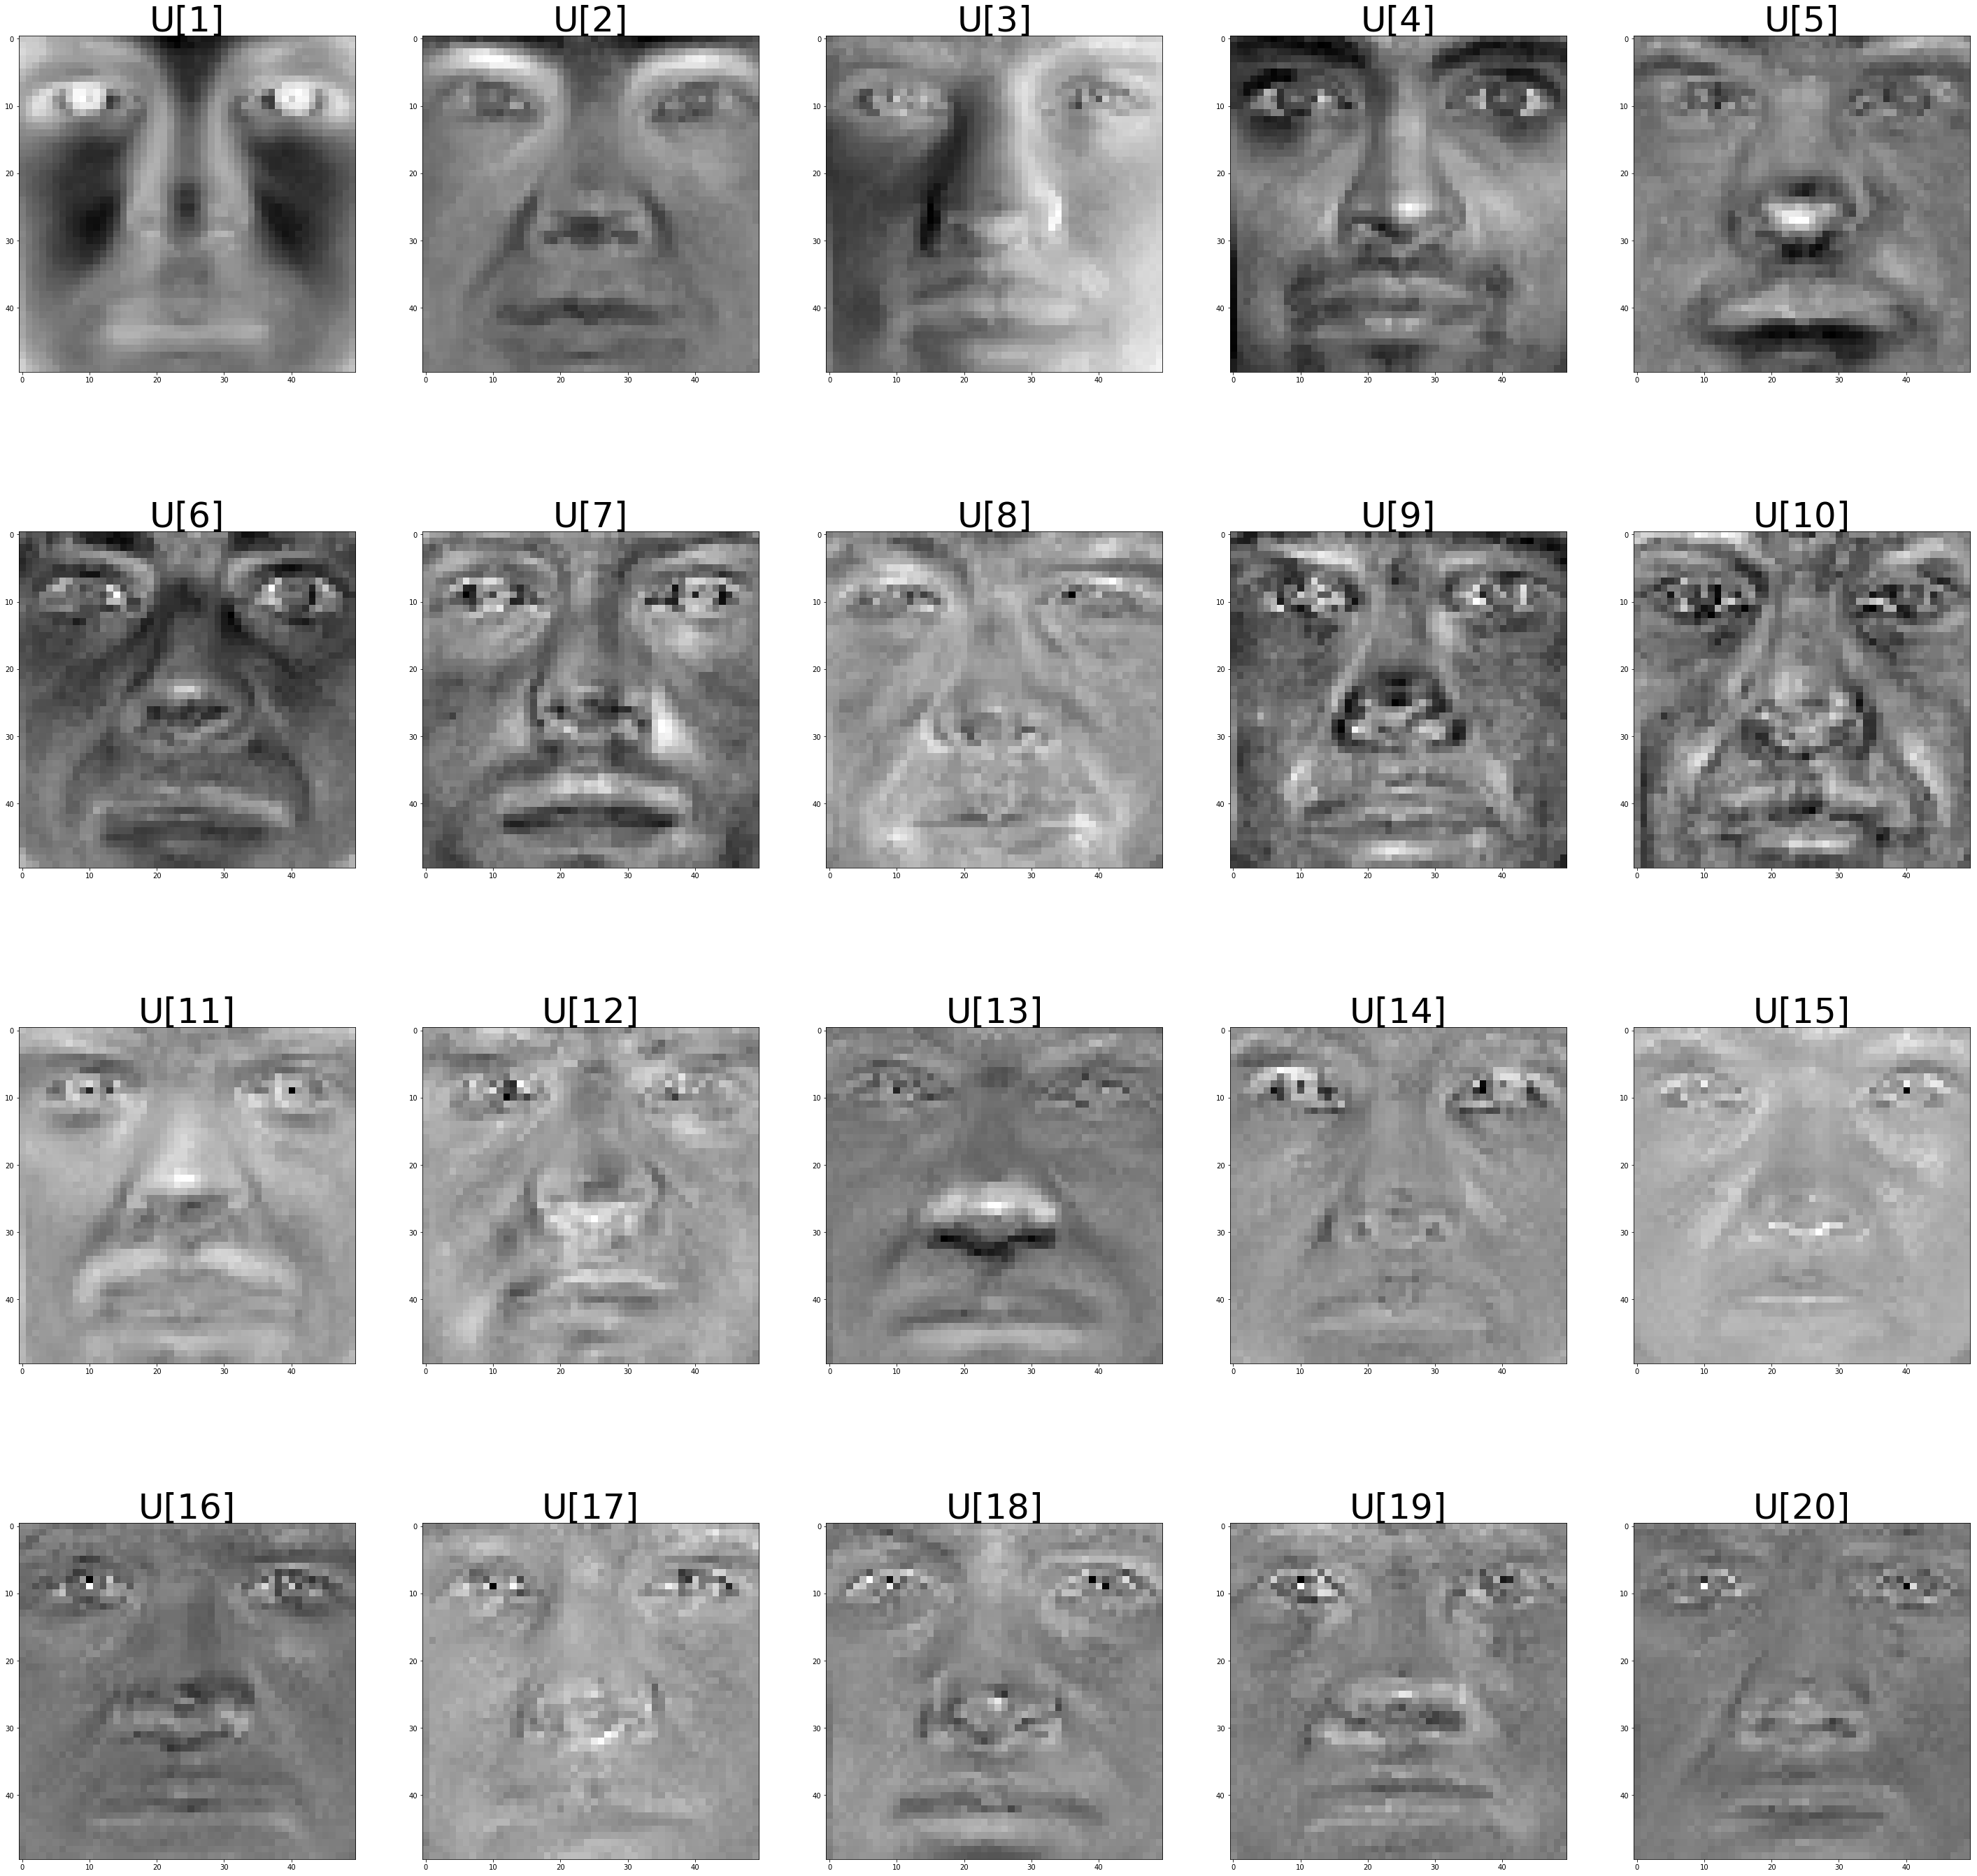

In [5]:
#Solution
%matplotlib inline

import numpy as np
import imageio
import os 
import matplotlib.pyplot as plt

data_folder = './yaleBfaces/subset0/'


def import_subset_images(path):
    images = os.listdir(path)
    x = []
    for image in images:
        x+= [np.array(imageio.imread(path+image)).astype(np.float64)]
    x=np.array(x)
    x=np.reshape(x,(x.shape[0],x.shape[1]*x.shape[2]))
    return x
    
def left_singular_vectors(X,num_vectors=20):
    # Centralization not considered for this assignment
    #mu = np.mean(X,axis=1)       # Centering the data 
    #X = X - np.expand_dims(mu,axis=1)
    u, s, vh = np.linalg.svd(X, full_matrices=True)
    return u.T[:num_vectors]


T = import_subset_images(data_folder)
u_20 = left_singular_vectors(T.T,20)
print('First 20 singular vectors are:\n')
print(u_20)

u_20 = np.reshape(u_20,(len(u_20),50,50))

fig=plt.figure(figsize=(50, 50))
columns = 5
rows = 4
for i in range(1, columns*rows+1):
    fig.add_subplot(rows, columns, i)
    plt.title('U[' + str(i) + ']', fontdict = {'fontsize' : 50})
    #plt.title(r"\begin{center} {\Large Temperature} \end{center}")
    plt.imshow(u_20[i - 1],cmap='gray')
    
print('\n First 20 vectors as images: \n')    
plt.show()


* Write a function that takes as an input the training set T (a matrix composed of vectorized pictures from subset 0), a vector containing the labels of the training set (i.e., if the the i-th sample belongs to class j, the i-th entry of the labels vector is j. In this exercise j is an integer between 1 and 10), the test samples S (a matrix composed of vectorized pictures from subsets 1-4) and the corresponding labels (in a separate vector), the 20 singular vectors from the first step, and the parameter k that denotes how many of the PCs are used. Use the Euclidean distance to classify each sample image based on its three nearest neighbors. (This is done by comparing the test samples with the training samples in the reduced space.) As an output give the fraction of images from S that were misclassified, i.e., the error rate. Repeat this for subsets 1 through 4 and for k = 1, . . . , 20. Plot the error rate for each subset.

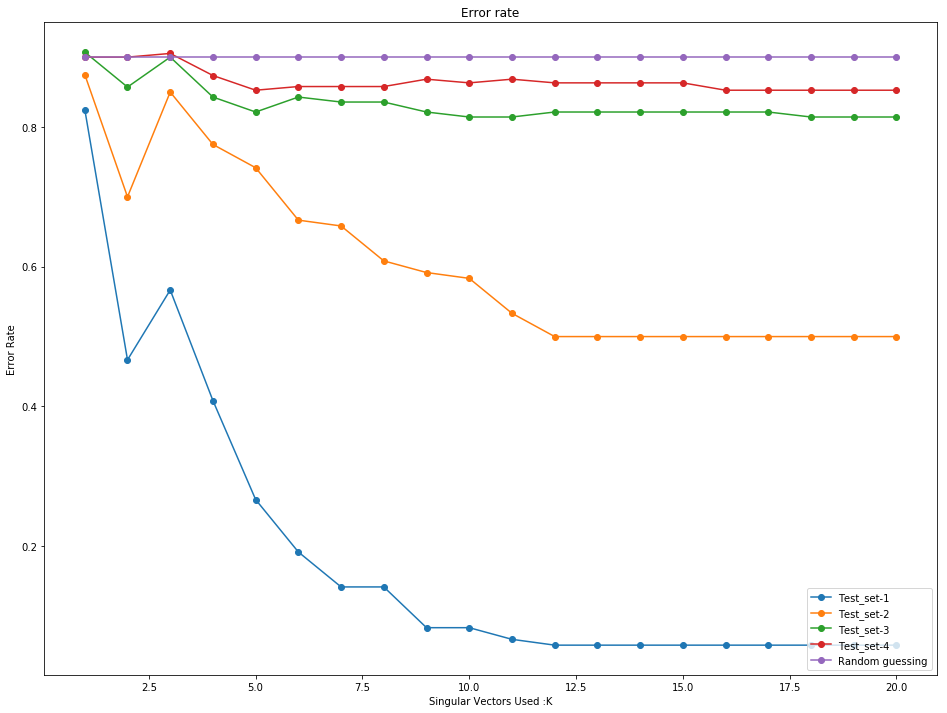

In [8]:
#Solution

#Training set
Train_s=T.T

#Training Labels
Train_y=[]
files = os.listdir("./yaleBfaces/subset0/")
for file in files:
    Train_y+=[int(file.split("person")[1].split("_")[0])]     #Get the label using the convention personYY_## using to name the samples
Train_y=np.array(Train_y)


#First 20 (K=20)
vector_number=20
#We get the first 20 (left) singular vectors of the Train set
u_20 = left_singular_vectors(Train_s,vector_number)

def knn_u_classifier(Training_set,Training_labels,Test_set,Test_labels,u_set,k_to_use):
    #We use first k of U to get to calculate the features strength of each element
    #on both sets
    Reduced_Training = np.dot(Training_set.T , u_set.T[:,:k_to_use])
    Reduced_test = np.dot(Test_set.T , u_set.T[:,:k_to_use])
    
    estimate_labels = []
    for test in Reduced_test:
        #We calculate the euclidean distance of a single test image against all the train set
        distances = np.linalg.norm(Reduced_Training-test,axis=1)
        
        #we get the indexes of the ones with shortest distances
        min_distances_indexes = np.argsort(distances)[:3]
        
        #we get the three shortest distances
        min_distances = distances[min_distances_indexes.tolist()]
        
        #We shift x_min_distances to prevent numerical unstability
        x_min_distance = min_distances-np.mean(min_distances)
        
        #We get the labels of those three nearest neighbours
        estimated_labels = Training_labels[min_distances_indexes]
        
        #We will use weighted distances to get the estimated distance among the three nearest neighbours
        weights_sum = np.exp(-x_min_distance[0])+np.exp(-x_min_distance[1])+np.exp(-x_min_distance[2])
        estimate_label=0
        
        #we sum each neighbour label multiplied by its weight based on its distance
        for i in range(len(estimated_labels)):
            estimate_label += (np.exp(-x_min_distance[i])/weights_sum)*estimated_labels[i]
        estimate_labels+=[round(estimate_label)]
    
    #We get the accuracy of our results getting the mean of how many we got right
    test_acc = ( estimate_labels == Test_labels).mean()
    return 1-test_acc

#Test sets
Test_sets={}
Test_s=[]
Test_y=[]

#for each test set we will get k error rates
for i in range(1,5):
    Test_sets["Test_set-"+str(i)]=[]
    
    #We import the test set
    files = os.listdir("./yaleBfaces/subset"+str(i)+"/")
    Test_s=import_subset_images("./yaleBfaces/subset"+str(i)+"/").T
    
    #We import the test labels
    Test_y=[]
    for file in files:
        #Get the label using the convention personYY_## using to name the samples
        Test_y+=[int(file.split("person")[1].split("_")[0])] 
    Test_y=np.array(Test_y) 
    
    #For each k to be used (K number of vectors of U to be used)
    for k in range(1,vector_number+1):
        Test_sets["Test_set-"+str(i)]+=[knn_u_classifier(Train_s,Train_y,Test_s,Test_y,u_20,k)]
    
    #Add results to the plot
    plt.plot(np.arange(1,vector_number+1),Test_sets["Test_set-"+str(i)], '-o', label="Test_set-"+str(i))

plt.plot(np.arange(1,vector_number+1),np.full(vector_number, 0.9), '-o', label="Random guessing")
plt.title('Error rate')
plt.xlabel('Singular Vectors Used :K')
plt.ylabel('Error Rate')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(16, 12)
plt.show()





* Repeat the above experiment without using the first three singular vectors, i.e., use k = 1, . . . , 17 singular vectors starting from the 4-th. Plot the error rate as before. How do you explain the difference in recognition rate?

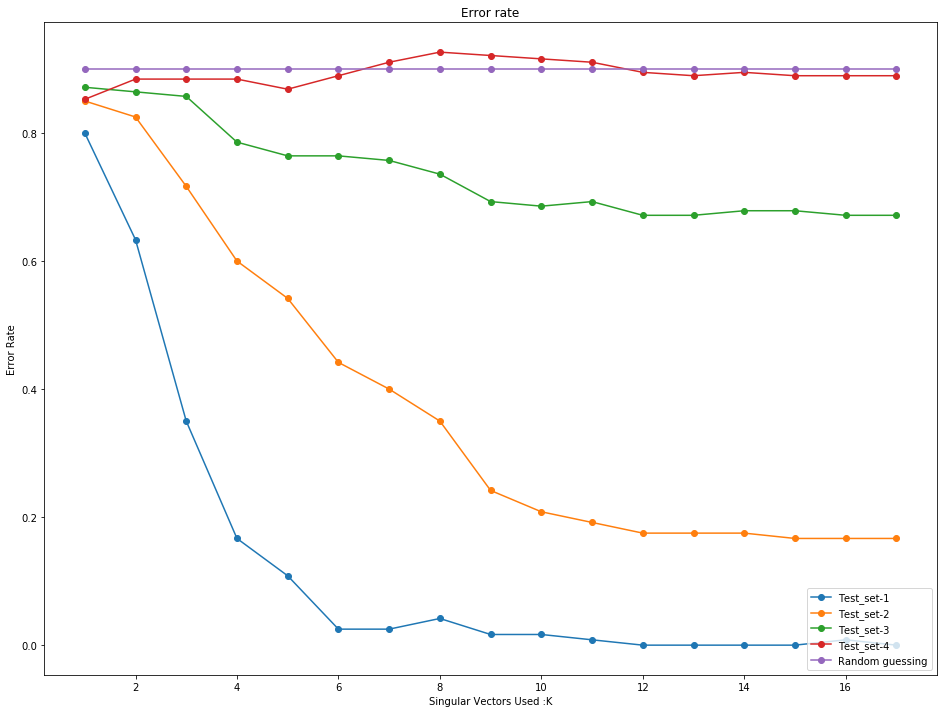

In [10]:
#Solution


#u_20 contains the first 20 (left) singular vectors of the Train set (calculated in previous section)


#change the vectors to be used
vector_number=17
u_17 = u_20[3:]

Test_sets={}

#for each test set we will get k error rates
for i in range(1,5):
    Test_sets["Test_set-"+str(i)]=[]
    
    #We import the test set
    files = os.listdir("./yaleBfaces/subset"+str(i)+"/")
    Test_s=import_subset_images("./yaleBfaces/subset"+str(i)+"/").T
    
    #We import the test labels
    Test_y=[]
    for file in files:
        #Get the label using the convention personYY_## using to name the samples
        Test_y+=[int(file.split("person")[1].split("_")[0])] 
    Test_y=np.array(Test_y) 
    
    #For each k to be used (K number of vectors of U to be used)
    for k in range(1,vector_number+1):
        Test_sets["Test_set-"+str(i)]+=[knn_u_classifier(Train_s,Train_y,Test_s,Test_y,u_17,k)]
    
    #Add results to the plot
    plt.plot(np.arange(1,vector_number+1),Test_sets["Test_set-"+str(i)], '-o', label="Test_set-"+str(i))

plt.plot(np.arange(1,vector_number+1),np.full(vector_number, 0.9), '-o', label="Random guessing")
plt.title('Error rate')
plt.xlabel('Singular Vectors Used :K')
plt.ylabel('Error Rate')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(16, 12)
plt.show()


Observation:

On the results we find a big difference among the test subsets, and a big improvement in accuracy when we drop the first 3 principal components.

When we take a look into the subsets, we find that they get progresively less illuminated, and it reflects on the accuracy results, the role played by the ilumination on the picture; the better the ilumination, the better captured are the details and brightness compared to the "ideal" train set (which explains why the set 1 has such a good accuracy rate).

The improvement in accuracy can be explained by taking a look at the first 3 principal component vectors. When plotted as images, we see they look like negatives of the images, capturing brightness information of the set, which are useless features for the facial clasification task (brightness is not discriminative for the classification). The following principal vector focuses on more specific features of the images, allowing for a higher accuracy rate. The only exception is the last set, which has a really poor illumination and most "details" are difficult to identify. Only more general features can be identified from the images, which is the reason why focusing on details on this specific set, actually hurts the accuracy.